In [1]:

#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

//anaconda/lib/python3.5/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    

In [5]:
GOOG.head()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-27,553.002509,555.282504,548.132463,548.342512,1897400,548.342512
2015-03-30,551.622503,553.472487,548.172490,552.032502,1287500,552.032502
2015-03-31,550.002460,554.712521,546.722468,548.002468,1588000,548.002468
2015-04-01,548.602502,551.142488,539.502472,542.562439,1963000,542.562439
2015-04-02,540.852427,540.852427,533.849395,535.532417,1716300,535.532417


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2015-03-27 to 2016-03-24
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Volume       251 non-null int64
Adj Close    251 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


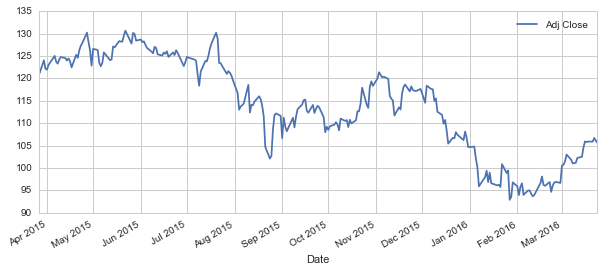

In [7]:

# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))


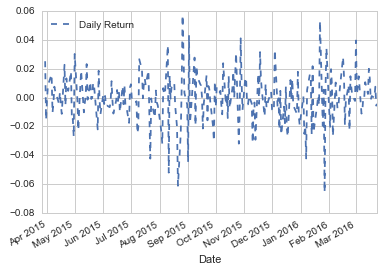

In [10]:

# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(legend=True,linestyle='--',marker='x')

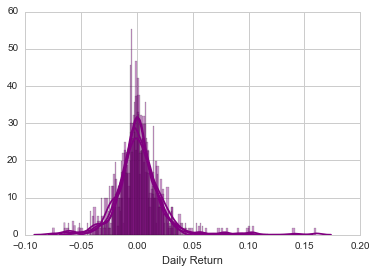

In [12]:
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')
sns.distplot(GOOG['Daily Return'].dropna(),bins=100,color='purple')
sns.distplot(MSFT['Daily Return'].dropna(),bins=100,color='purple')
sns.distplot(AMZN['Daily Return'].dropna(),bins=100,color='purple')


In [13]:
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [15]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-03-27,121.006860,370.559998,548.342512,39.881698
2015-03-30,124.070079,374.589996,552.032502,39.871962
2015-03-31,122.165384,372.100006,548.002468,39.579932
2015-04-01,121.988660,370.260010,542.562439,39.638339
2015-04-02,123.039186,372.250000,535.532417,39.219761


In [18]:
tech_rets = closing_df.pct_change()


In [20]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-03-27,NaN,NaN,NaN,NaN
2015-03-30,0.025314,0.010875,0.006729,-0.000244
2015-03-31,-0.015352,-0.006647,-0.007300,-0.007324
2015-04-01,-0.001447,-0.004945,-0.009927,0.001476
2015-04-02,0.008612,0.005375,-0.012957,-0.010560


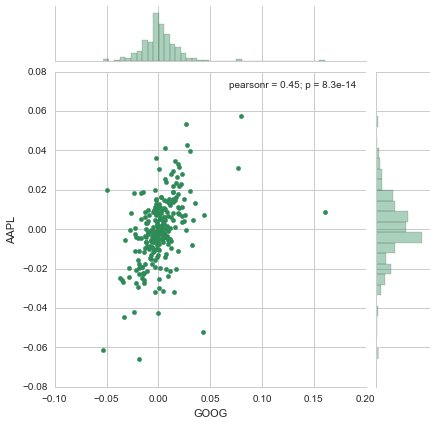

In [23]:
sns.jointplot('GOOG','AAPL',tech_rets,kind='scatter',color='seagreen')


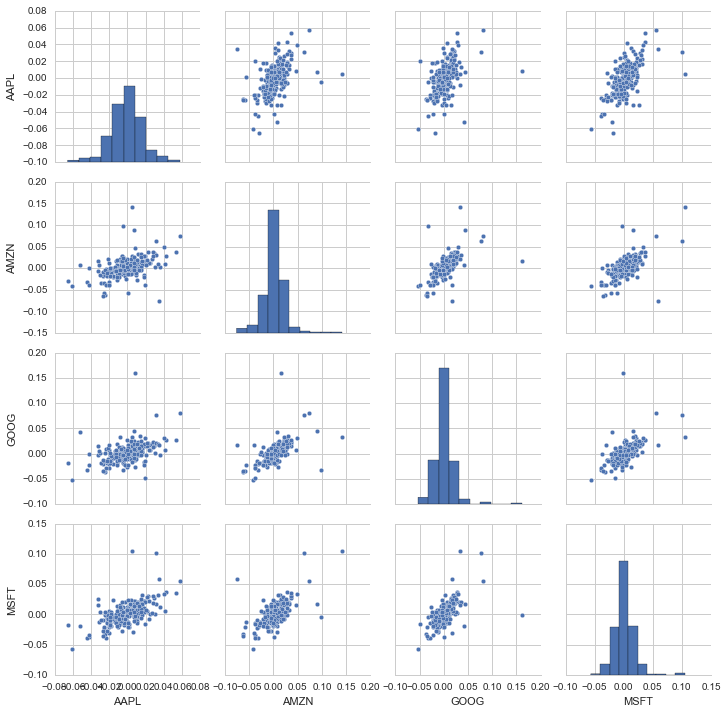

In [25]:
sns.pairplot(tech_rets.dropna())


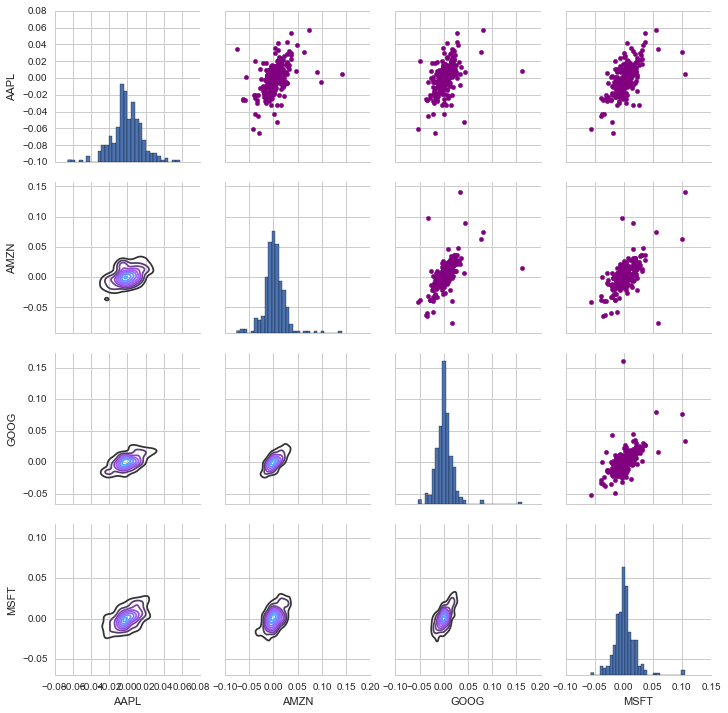

In [28]:
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

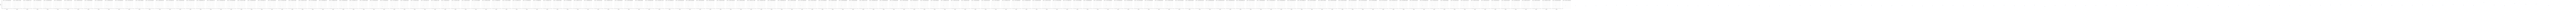